In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [25]:
## Flow clean without 2021 and January 2022
df = pd.read_csv(r"C:\Users\hub_stag6\Documents\Python Scripts\assets\JoinDataset.csv", sep=",")
df = df.drop(['Unnamed: 0'], axis=1)
#Data to DateTime variable
df['date'] =  pd.to_datetime(df['date'], format="%Y-%m-%d")
df.shape

(13770, 28)

In [26]:
df.columns

Index(['zone_id', 'date', 'year', 'Mois', 'Jour_semaine', 'Somme par jour',
       'nom_capteur', 'Quartier', 'shop', 'id _capteur_quartier',
       'type_capteur', 'address', 'zipcode', 'city', 'longitude', 'latitude',
       'weather_date', 'main', 'temperature', 'temperaturefeelslike',
       'temperaturemin', 'temperaturemax', 'pressure', 'humidity',
       'visibility', 'windspeed', 'rain', 'snow'],
      dtype='object')

In [27]:
#Average visitors per day.
df["avg_visitors_perDay"] = df.groupby(['date'])['Somme par jour'].transform('mean')

## Plot average visitor and temperature per day

In [28]:
temp = df.groupby(['date']).temperature.mean().reset_index()
visits = df.groupby(['date']).avg_visitors_perDay.mean().reset_index()

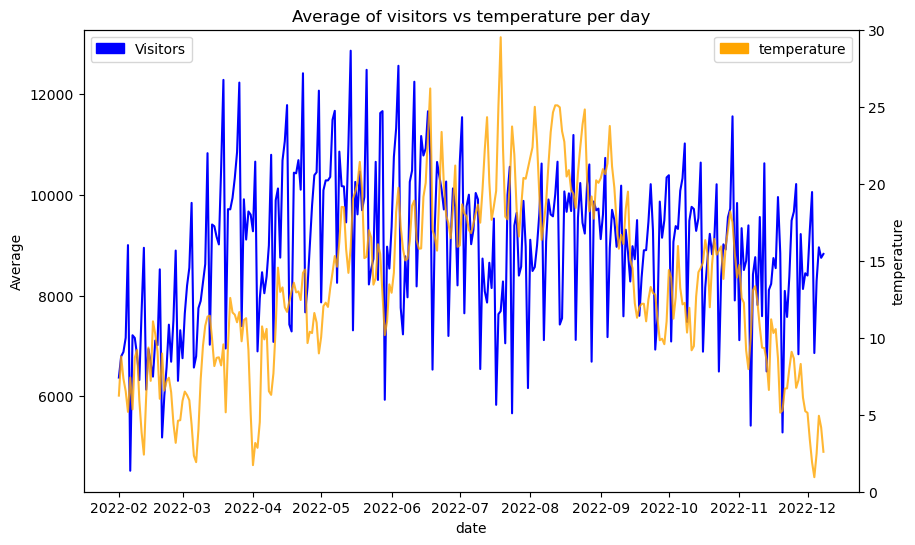

In [29]:
# Plot chart with two axes
import matplotlib.patches as mpatches
plt.figure(figsize=(10, 6))

# plot line graph on axis #1
ax1 = sns.lineplot(
    x=visits.date, 
    y=visits.avg_visitors_perDay, 
    data=visits, 
    sort=False, 
    color='blue',
)
ax1.set_ylabel('Average')
#ax1.set_ylim(0, 14000)
ax1_patch = mpatches.Patch(color='blue', label='Visitors')
ax1.legend(handles=[ax1_patch], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
sns.lineplot(
    x=temp.date, 
    y=temp.temperature, 
    data=temp, 
    color='orange', 
    alpha=0.8, 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('temperature')
ax2.set_ylim(0, 30)
ax2_patch = mpatches.Patch(color='orange', label='temperature')
ax2.legend(handles=[ax2_patch], loc="upper right")

ax2.set_title('Average of visitors vs temperature per day')
plt.show()

Plot zone 10155

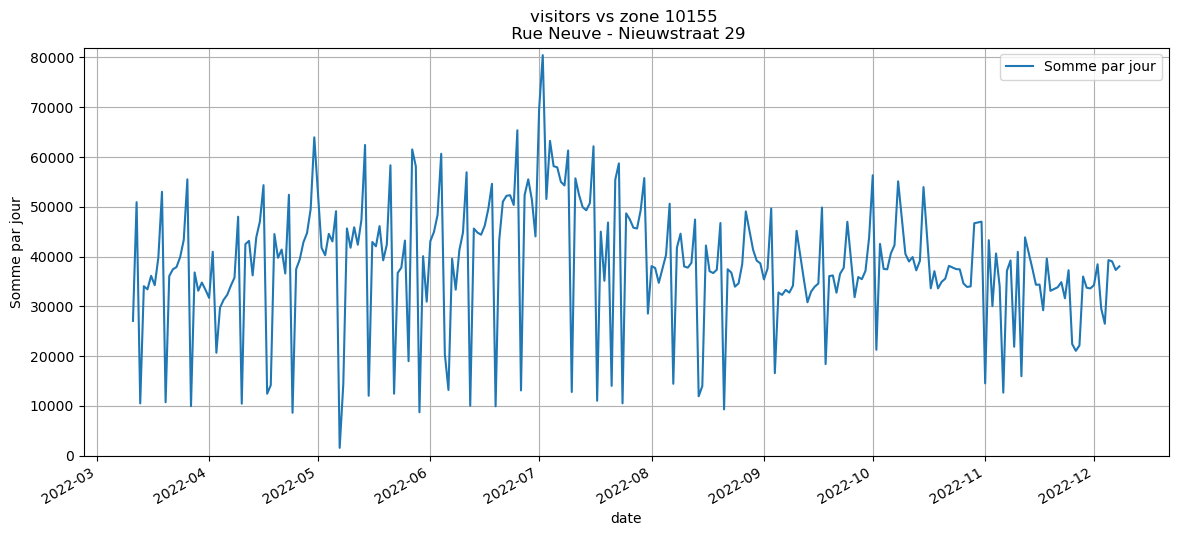

In [30]:
df.set_index('zone_id', inplace=True)
a = df.loc[[10155], ['date','Somme par jour']]
a = a.reset_index(level=0, drop=True)

ax = a.plot(x='date', y='Somme par jour', kind='line', figsize=(14,6))	
ax.grid(True) # turn on grid
ax.set_ylabel('Somme par jour')
ax.set_ylim(0, 82000)
ax.legend(loc="upper right")
ax.set_title('visitors vs zone 10155 \n Rue Neuve - Nieuwstraat 29')
plt.show()


Plot zone 10148

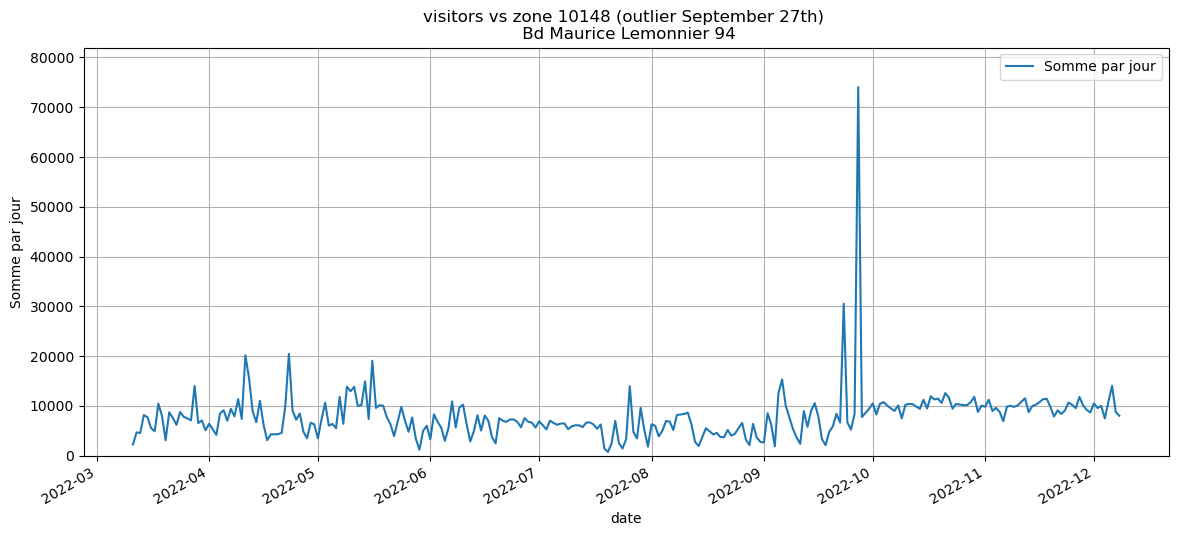

In [31]:
a = df.loc[[10148], ['date','Somme par jour']]
a = a.reset_index(level=0, drop=True)

ax = a.plot(x='date', y='Somme par jour', kind='line', figsize=(14,6))	
ax.grid(True) # turn on grid
ax.set_ylabel('Somme par jour')
ax.set_ylim(0, 82000)
ax.legend(loc="upper right")
ax.set_title('visitors vs zone 10148 (outlier September 27th) \n Bd Maurice Lemonnier 94')
plt.show()

## Plot average visitors and main temperature

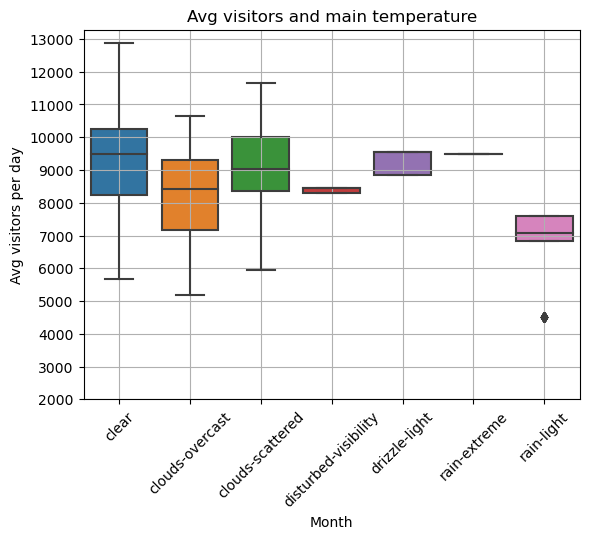

In [32]:
order = ['clear', 'clouds-overcast', 'clouds-scattered', 'disturbed-visibility', 'drizzle-light', 'rain-extreme', 'rain-light']
ax = sns.boxplot(data=df, x='main', y='avg_visitors_perDay', order=order)

ax.grid(True)
ax.set_xlabel('Month')
ax.set_ylabel('Avg visitors per day')

# Title
title_boxplot = 'Avg visitors group by weather'
plt.title(title_boxplot)
plt.suptitle('')

start, end = ax.get_ylim()
ax.set_yticks(np.arange(2000, 13500, 1000))
#ax.set_ylim(2000, 13500)
#ax.legend(loc="upper right")

plt.xticks(rotation = 45)
plt.title('Avg visitors and main temperature')
plt.show()

In [33]:
df.groupby(['main']).date.nunique()

main
clear                   187
clouds-overcast          41
clouds-scattered         74
disturbed-visibility      2
drizzle-light             2
rain-extreme              1
rain-light                4
Name: date, dtype: int64

## General correlation between variables

In [34]:
#Prepare DataFrame
df = df.reset_index(drop=False)
corr_general = df.loc[:,['zone_id','date', 'Jour_semaine', 'Somme par jour', 'avg_visitors_perDay', 'temperature', 'temperaturefeelslike', 'pressure', 'humidity',
       'visibility', 'windspeed', 'rain', 'Quartier', 'shop', 'type_capteur']]
corr_general.drop_duplicates(inplace=True)
#corr_general


In [35]:
corr_general['type_capteur'].value_counts()

fixe          12901
temporaire      822
Name: type_capteur, dtype: int64

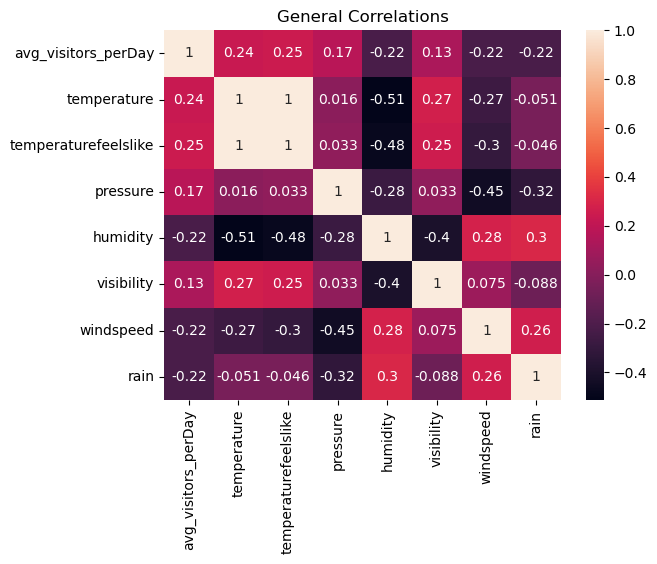

In [36]:
# Correlation matrix 
corrMatrix = corr_general[['avg_visitors_perDay','temperature', 'temperaturefeelslike', 'pressure', 'humidity',
       'visibility', 'windspeed', 'rain']].corr()
ax = sns.heatmap(corrMatrix, annot=True)
ax.set_title('General Correlations')
plt.show()


In [37]:
# Remove temporary sensors 
corr_general_modif = corr_general[corr_general['type_capteur'] != 'temporaire']
corr_general_modif['type_capteur'].value_counts()

fixe    12901
Name: type_capteur, dtype: int64

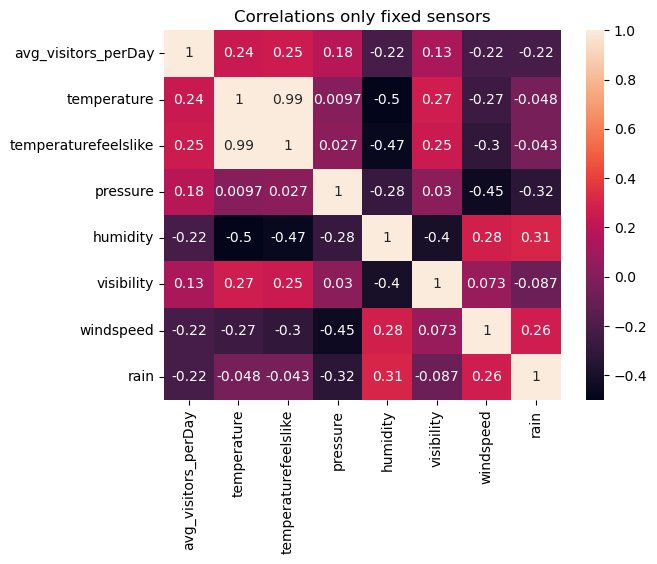

In [38]:
# Correlation matrix, only fixed sensors
corrMatrix_fix = corr_general_modif[['avg_visitors_perDay','temperature', 'temperaturefeelslike', 'pressure', 'humidity',
       'visibility', 'windspeed', 'rain']].corr()
ax = sns.heatmap(corrMatrix_fix, annot=True)
ax.set_title('Correlations only fixed sensors')
plt.show()

#it is the same correlation because of avg_visitors variable

## Correlation weekend vs weather 

In [39]:
#Correlation matrix - weekend
corr_weekend = corr_general.loc[ ( corr_general['Jour_semaine'] == 'Sunday') | (corr_general['Jour_semaine'] == 'Saturday' ), :]
corr_weekend['Jour_semaine'].value_counts()

Saturday    1967
Sunday      1887
Name: Jour_semaine, dtype: int64

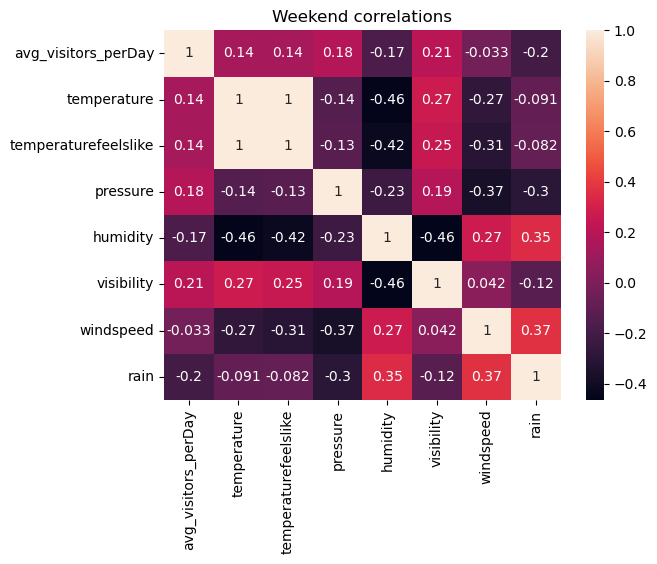

In [40]:
corrMatrix_weekend = corr_weekend[['avg_visitors_perDay','temperature', 'temperaturefeelslike', 'pressure', 'humidity',
       'visibility', 'windspeed', 'rain']].corr()
ax = sns.heatmap(corrMatrix_weekend, annot=True)
ax.set_title('Weekend correlations')
plt.show()


## Correlation weekday vs weather 

In [41]:
corr_weekday = corr_general.loc[ ( corr_general['Jour_semaine'] != 'Sunday') & ( corr_general['Jour_semaine'] != 'Saturday'), :]
corr_weekday['Jour_semaine'].value_counts()

Thursday     2013
Wednesday    2012
Tuesday      1992
Friday       1983
Monday       1916
Name: Jour_semaine, dtype: int64

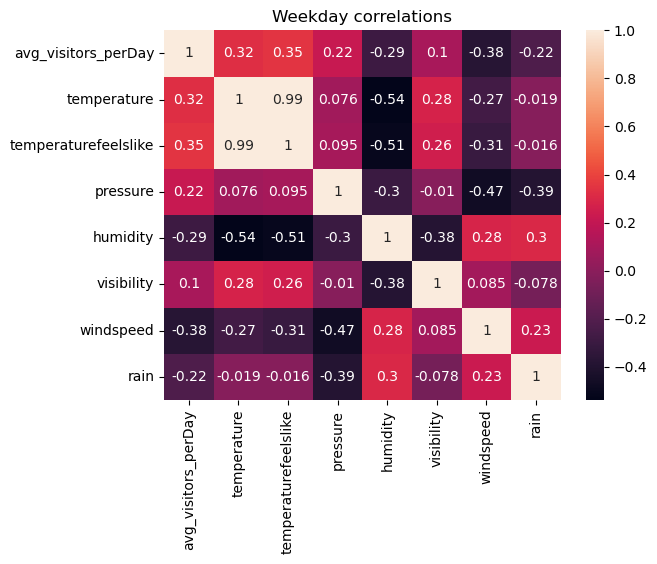

In [42]:
corrMatrix_weekday = corr_weekday[['avg_visitors_perDay','temperature', 'temperaturefeelslike', 'pressure', 'humidity',
       'visibility', 'windspeed', 'rain']].corr()
ax = sns.heatmap(corrMatrix_weekday, annot=True)
ax.set_title('Weekday correlations')
plt.show()

# Correlations by Sensor

### Correlation 'Somme par jour' vs 'rain' by Sensor

In [43]:
# Count number of days per sensor 
corr_general['number_days'] = corr_general.groupby(['zone_id'])['date'].transform('count')

# Correlation 'Somme par jour' vs rain by Sensor
# 'Somme par jour' variable
corr_Sensor_rain = corr_general.groupby(['zone_id', 'Quartier', 'shop', 'type_capteur','number_days'])[['Somme par jour','rain']].corr().unstack()
corr_Sensor_rain.columns = ['Corr_vistsDay', 'Corr_visitsDay_rain', 'Corr_rain_visitsDay', 'Corr_rain_rain']
corr_Sensor_rain = corr_Sensor_rain.drop(columns=['Corr_vistsDay', 'Corr_rain_visitsDay', 'Corr_rain_rain'])
corr_Sensor_rain = corr_Sensor_rain.sort_values(by=['type_capteur','Corr_visitsDay_rain'], ascending=[True, True]).reset_index()
corr_Sensor_rain.head()

,zone_id,Quartier,shop,type_capteur,number_days,Corr_visitsDay_rain
0,10175,Helmet,Boucherie Elyoussra,fixe,58,-0.332306
1,10189,Simonis,Simonis 2.42,fixe,311,-0.307501
2,10178,Tongres,Proximus Center,fixe,121,-0.272249
3,10177,Place Jourdan,Au Vatel (50m),fixe,310,-0.217634
4,10152,Mont Des Arts,Art Thema,fixe,219,-0.207499


### Correlation 'Somme par jour' vs 'Temperature feels like' by Sensor

In [44]:
# Correlation 'Somme par jour' vs 'Temperature feels like' by Sensor
# 'Somme par jour' variable
corr_Sensor_temp = corr_general.groupby(['zone_id', 'Quartier', 'shop', 'type_capteur', 'number_days'])[['Somme par jour','temperaturefeelslike']].corr().unstack()
corr_Sensor_temp.columns = ['Corr_visitsDay_visitsDay', 'Corr_visitsDay_temperaturefeels', 'Corr_temperaturefeels_visitsDay', 'Corr_temperaturefeels_temperaturefeels']
corr_Sensor_temp = corr_Sensor_temp.drop(columns=['Corr_visitsDay_visitsDay', 'Corr_temperaturefeels_visitsDay', 'Corr_temperaturefeels_temperaturefeels'])
corr_Sensor_temp = corr_Sensor_temp.sort_values(by=['type_capteur', 'Corr_visitsDay_temperaturefeels'], ascending=[True, True]).reset_index()
corr_Sensor_temp.head()

,zone_id,Quartier,shop,type_capteur,number_days,Corr_visitsDay_temperaturefeels
0,10185,Cureghem,Slina Hotel,fixe,309,-0.456236
1,10181,Flagey,Dim yum,fixe,310,-0.365998
2,10151,Marolles,Machao Design,fixe,166,-0.248476
3,10148,Lemonnier,Centre medical lemonnier,fixe,272,-0.202452
4,10203,Georges Henri,Ghyoptic,fixe,311,-0.169911


### Correlation between the sensor -categorical variable- and 'Somme par jour' 

In [45]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=corr_general.groupby('zone_id')['Somme par jour'].apply(list)

# Performing the ANOVA test 

# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


In [46]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


corr_general.rename(columns = {"Somme par jour":"Somme_par_jour"}, inplace = True)
model = ols('Somme_par_jour ~ zone_id', data=corr_general).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
zone_id,8.691514e+09,1.0,119.461209,1.078585e-27
Residual,1.001704e+12,13768.0,NaN,NaN


Determine whether the categorical variable (sensor) has any influence on the numerical variable:

The anova_lm() function returns the p-value (0.0).   
- if p < 0.05, this means that the categorical variable has significant influence on the numerical variable  
- if p > 0.05, this means that the categorical variable has no significant influence on the numerical variable  

Since the p-value is now 0.0 (<0.05), this means that the sensor has significant influence on the 'Somme par jour'.

## Join Correlation dataframes

In [47]:
corr_Sensor_rain.sort_values('zone_id', inplace=True)
corr_Sensor_temp.sort_values('zone_id', inplace=True)
corr_df=pd.merge(corr_Sensor_rain, corr_Sensor_temp[['zone_id','Corr_visitsDay_temperaturefeels']], on='zone_id')
corr_df.tail(4)

,zone_id,Quartier,shop,type_capteur,number_days,Corr_visitsDay_rain,Corr_visitsDay_temperaturefeels
58,13202,Saint Gilles,Librairie Novembre,temporaire,27,-0.192693,0.388604
59,13204,Saint Gilles,Batist Titre Service,temporaire,27,-0.083131,0.377201
60,13485,Congres,Inksane,fixe,17,0.426056,0.564491
61,13487,Luxembourg,Pharmacie,fixe,16,0.189732,0.713100


In [48]:
corr_df.to_csv('./assets/corr_df.csv')